In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Cargar el conjunto de datos
df = pd.read_csv('../data/pvasco_filtro.csv')

# Convertir variables categóricas a numéricas
df_columnas_numericas = df._get_numeric_data()
df_columnas_categoricas = df.drop(columns=df_columnas_numericas.columns)
df_columnas_categoricas = pd.get_dummies(df_columnas_categoricas, drop_first=True)
df = pd.concat([df_columnas_numericas, df_columnas_categoricas], axis=1)

# Separar características y objetivo
X = df.drop('Importe de adjudicación', axis=1)
y = df['Importe de adjudicación']
#y = np.exp(y)
# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo Random Forest
model = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados
print("Parámetros óptimos:", best_params)

# Realizar predicciones en el conjunto de prueba
y_pred_test = best_model.predict(X_test_scaled)
y_pred_train = best_model.predict(X_train_scaled)

# Calcular las métricas de evaluación para el conjunto de entrenamiento
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Imprimir las métricas de evaluación para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
print("RMSE:", rmse_train)
print('MSE:', mse_train)
print('R2:', r2_train)

# Calcular las métricas de evaluación para el conjunto de prueba
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir las métricas de evaluación para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
print("RMSE:", rmse_test)
print('MSE:', mse_test)
print('R2:', r2_test)

# Respuesta
print("El modelo Random Forest tiene un R2 de {:.2f} en el conjunto de prueba. Esto indica que el modelo explica el {:.2f}% de la variabilidad del importe de adjudicación.".format(r2_test, r2_test*100))


Parámetros óptimos: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Métricas para el conjunto de entrenamiento:
RMSE: 22980.39369598809
MSE: 528098494.4226091
R2: 0.9818534064525356

Métricas para el conjunto de prueba:
RMSE: 38181.62334758993
MSE: 1457836361.4572241
R2: 0.956687498844709
El modelo Random Forest tiene un R2 de 0.96 en el conjunto de prueba. Esto indica que el modelo explica el 95.67% de la variabilidad del importe de adjudicación.


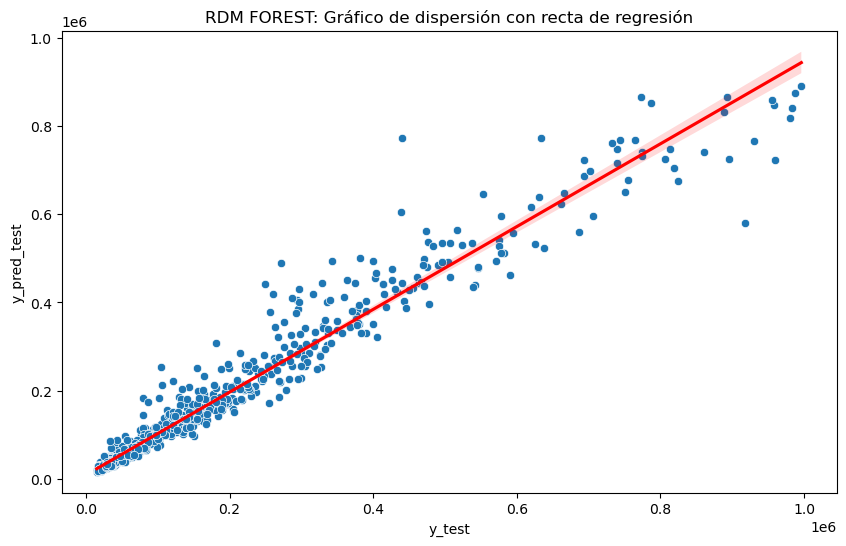

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_test)
sns.regplot(x=y_test, y=y_pred_test, scatter=False, color='red') 
plt.title('RDM FOREST: Gráfico de dispersión con recta de regresión')
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()